<a href="https://colab.research.google.com/github/furkanonat/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Furkan_Onat_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [37]:
# CONFIDENCE INTERVALS

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=column_headers)

df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
def confidence_interval(data, confidence=0.95):
  sample = np.array(data)
  #Sample standard deviation: s
  s= np.std(sample, ddof=1)
  #Sample size : n
  n = len(sample)
  standard_error = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence)/ 2, n-1)
  margin_of_error= t*standard_error
  x_bar= np.mean(sample)
  lower_bound= x_bar - margin_of_error
  upper_bound= x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)


In [39]:
dem= df[df['party']== 'democrat']
rep= df[df['party']=='republican']

print(dem['budget'].mean())

0.8884615384615384


In [40]:
dem_cleaned = dem.dropna()
rep_cleaned= rep.dropna()

dem_cleaned.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [41]:
dem_cleaned['budget'].describe()

count    124.000000
mean       0.854839
std        0.353692
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: budget, dtype: float64

In [42]:
confidence_interval(dem_cleaned['budget'], confidence=0.95)

(0.791966749899413, 0.8548387096774194, 0.9177106694554258)

# **If we took another sample of 124 votes, there is a 95% chance that the sample mean would be between 0.791966749899413 and 0.9177106694554258.**

In [0]:
dem_budget = dem_cleaned['budget']


0.8548387096774194
plus or minus 0.06287195977800641


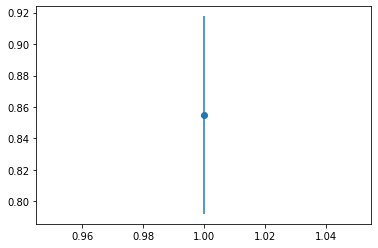

In [44]:
lower1, mean1, upper1 = confidence_interval(dem_budget)

moe1 = mean1 - lower1

print(mean1)
print('plus or minus', moe1)

plt.errorbar(1, mean1, yerr=moe1, fmt='o')
plt.show()

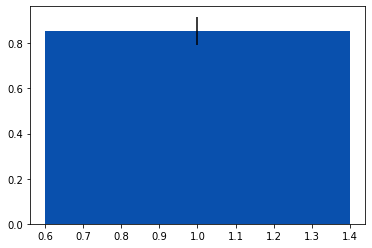

In [45]:
plt.bar(1, mean1, yerr=moe1, color='#0950ad')
plt.show()


# **Chi-squared tests:**

In [46]:
column_headers2 = ['sex', 'length', 'diameter', 'height', 'whole_height', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names= column_headers2)

print(df2.shape)
df2.head()


(4177, 9)


,sex,length,diameter,height,whole_height,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [47]:
df2.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_height      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [48]:
df2.rings.value_counts(dropna=False).sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: rings, dtype: int64

In [49]:
df2.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [50]:
observed = pd.crosstab(df2['sex'], df2['rings'])

observed


rings,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,4,16,44,122,238,248,200,128,88,56,41,30,26,19,15,12,7,3,6,1,1,0,1,1
I,1,1,12,51,100,216,267,274,173,92,62,21,24,14,10,7,7,5,2,2,1,0,0,0,0,0,0,0
M,0,0,3,6,11,27,80,172,278,294,225,118,91,56,52,30,25,18,15,12,6,3,3,1,0,1,1,0


In [67]:
observed_margins = pd.crosstab(df2['sex'], df2['rings'], margins=True)
observed_margins


rings,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,All
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,4,16,44,122,238,248,200,128,88,56,41,30,26,19,15,12,7,3,6,1,1,0,1,1,1307
I,1,1,12,51,100,216,267,274,173,92,62,21,24,14,10,7,7,5,2,2,1,0,0,0,0,0,0,0,1342
M,0,0,3,6,11,27,80,172,278,294,225,118,91,56,52,30,25,18,15,12,6,3,3,1,0,1,1,0,1528
All,1,1,15,57,115,259,391,568,689,634,487,267,203,126,103,67,58,42,32,26,14,6,9,2,1,1,2,1,4177


In [79]:
row_sums = observed_margins.iloc[0:3, 28:].values
row_sums = row_sums.T[0]

row_sums

array([1307, 1342, 1528])

In [80]:
col_sums = observed_margins.iloc[3:, 0:28].values
col_sums = col_sums[0]

col_sums

array([  1,   1,  15,  57, 115, 259, 391, 568, 689, 634, 487, 267, 203,
       126, 103,  67,  58,  42,  32,  26,  14,   6,   9,   2,   1,   1,
         2,   1])

In [93]:
total_total = df2.shape[0]

total_total

4177

In [94]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(3, 28)
[[  0.312904     0.312904     4.69355997  17.83552789  35.98395978
   81.0421355  122.34546325 177.72947091 215.59085468 198.38113479
  152.38424707  83.54536749  63.51951161  39.42590376  32.2291118
   20.96456787  18.14843189  13.14196792  10.01292794   8.13550395
    4.38065597   1.87742399   2.81613598   0.625808     0.312904
    0.312904     0.625808     0.312904  ]
 [  0.32128322   0.32128322   4.81924826  18.3131434   36.94757003
   83.21235336 125.62173809 182.48886761 221.36413694 203.69355997
  156.46492698  85.7826191   65.22049318  40.48168542  33.09217141
   21.52597558  18.63442662  13.49389514  10.28106296   8.35336366
    4.49796505   1.92769931   2.89154896   0.64256644   0.32128322
    0.32128322   0.64256644   0.32128322]
 [  0.36581278   0.36581278   5.48719176  20.8513287   42.06847019
   94.74551113 143.03279866 207.78166148 252.04500838 231.92530524
  178.15082595  97.67201341  74.25999521  46.09241082  37.67871678
   24.50945655  21.21714149  15.36413694

#**Chi-Squared Statistic**

In [95]:
chi2 = ((observed-expected)**2 / expected).sum().sum()

chi2



1316.07973176115

# **Chi-Squared Statistic by Scipy** 

In [92]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("chi2 statistic", chi2)
print("p value", p_value)
print("degrees of freedom",dof)
print("expected frequencies table", expected)

chi2 statistic 1316.07973176115
p value 8.004519071049616e-240
degrees of freedom 54
expected frequencies table [[  0.312904     0.312904     4.69355997  17.83552789  35.98395978
   81.0421355  122.34546325 177.72947091 215.59085468 198.38113479
  152.38424707  83.54536749  63.51951161  39.42590376  32.2291118
   20.96456787  18.14843189  13.14196792  10.01292794   8.13550395
    4.38065597   1.87742399   2.81613598   0.625808     0.312904
    0.312904     0.625808     0.312904  ]
 [  0.32128322   0.32128322   4.81924826  18.3131434   36.94757003
   83.21235336 125.62173809 182.48886761 221.36413694 203.69355997
  156.46492698  85.7826191   65.22049318  40.48168542  33.09217141
   21.52597558  18.63442662  13.49389514  10.28106296   8.35336366
    4.49796505   1.92769931   2.89154896   0.64256644   0.32128322
    0.32128322   0.64256644   0.32128322]
 [  0.36581278   0.36581278   5.48719176  20.8513287   42.06847019
   94.74551113 143.03279866 207.78166148 252.04500838 231.92530524
  1

**Result: On the basis of a test-statistic of 1316, and a p-value of almost 0, I reject the null hypothesis that sex of the abalones and the rings of the abalones are independent.**

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)